ML-Clustering 

https://github.com/lucas-de-sa/national-anthems-clustering/blob/master/Cluster_Anthems.ipynb

In [1]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
%matplotlib inline
plt.style.use('ggplot')


In [2]:

import plotly.express as px
import plotly.graph_objects as go

In [3]:
from __future__ import print_function
from sklearn.cluster import KMeans

In [4]:
import seaborn            as sns

In [5]:
recipes = pd.read_csv('dataset/full_dataset.csv')

In [6]:
recipes_c = pd.read_csv('dataset/Recipe_sample_dataset_small_heroclean.csv')

In [7]:
recipes.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [8]:
recipes.shape

(2231142, 7)

In [9]:
recipes_c.shape

(22311, 10)

In [10]:
recipes_c.head()

,Unnamed: 0,Unnamed: 0.1,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
0,0,7964,Apple Dip,"[""1 (7 oz.) jar Marshmallow Creme"", ""1 (8 oz.)...","[""Bring cream cheese to room temperature. Mix ...",www.cookbooks.com/Recipe-Details.aspx?id=980881,Gathered,"[""Marshmallow Creme"", ""cream cheese""]",jar marshmallow creme pkg cream cheese philade...,bring cream cheese room temperature mix marshm...
1,1,1765246,Wasabi Whipped Potatoes,"[""1 1/2 lb. russet or Yukon gold potatoes, pee...","[""Place potatoes in large saucepan, cover with...",www.vegetariantimes.com/recipe/wasabi-whipped-...,Recipes1M,"[""russet"", ""low-fat milk"", ""butter"", ""wasabi p...",russet yukon gold potato inch cube low fat m...,place potato large saucepan cover cold water s...
2,2,677031,Caramel Breakfast Rolls,"[""2 (1 lb.) loaves frozen bread dough, thawed""...","[""Cut 1 loaf of bread into small pieces; place...",www.cookbooks.com/Recipe-Details.aspx?id=537560,Gathered,"[""bread"", ""brown sugar"", ""regular vanilla pudd...",loaf bread dough brown sugar pkg regular van...,loaf bread small piece place piece greased x x...
3,3,1325712,Egg And Sausage Muffins,"[""1/4 cup cream (half & half)"", ""12 large eggs...","[""Preheat oven to 350 \u00b0F (175 \u00b0C). S...",www.epicurious.com/recipes/member/views/egg-an...,Gathered,"[""cream"", ""eggs"", ""pepper"", ""salt"", ""pork saus...",cream half half large egg pepper salt pork...,preheat oven f spray muffin tin spray like pa...
4,4,294137,Taco Soup,"[""2 lb. lean ground beef"", ""1 small onion, cho...","[""Brown ground beef and onions; drain fat."", ""...",www.cookbooks.com/Recipe-Details.aspx?id=288957,Gathered,"[""lean ground beef"", ""onion"", ""pintos"", ""kidne...",lean ground beef small onion bean l bean t...,brown ground beef onion fat boil heat simmer ...


In [11]:
recipes[['directions']][0:10]

,directions
0,"[""In a heavy 2-quart saucepan, mix brown sugar..."
1,"[""Place chipped beef on bottom of baking dish...."
2,"[""In a slow cooker, combine all ingredients. C..."
3,"[""Boil and debone chicken."", ""Put bite size pi..."
4,"[""Combine first four ingredients and press in ..."
5,"[""Wash potatoes; prick several times with a fo..."
6,"[""Cream sugar and butter."", ""Add egg and beat ..."
7,"[""Mix together both cans of corn, crackers, eg..."
8,"[""Roll steak strips in flour."", ""Brown in skil..."
9,"[""Empty Cool Whip into a bowl."", ""Drain juice ..."


In [12]:
recipes['title'][0]

'No-Bake Nut Cookies'

In [13]:
recipes['NER'][0]

'["brown sugar", "milk", "vanilla", "nuts", "butter", "bite size shredded rice biscuits"]'

In [14]:
recipes['ingredients'][0]

'["1 c. firmly packed brown sugar", "1/2 c. evaporated milk", "1/2 tsp. vanilla", "1/2 c. broken nuts (pecans)", "2 Tbsp. butter or margarine", "3 1/2 c. bite size shredded rice biscuits"]'

In [15]:
recipes['directions'][0]

'["In a heavy 2-quart saucepan, mix brown sugar, nuts, evaporated milk and butter or margarine.", "Stir over medium heat until mixture bubbles all over top.", "Boil and stir 5 minutes more. Take off heat.", "Stir in vanilla and cereal; mix well.", "Using 2 teaspoons, drop and shape into 30 clusters on wax paper.", "Let stand until firm, about 30 minutes."]'

Trying to create a Document Term Matrix from NER column

In [16]:
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
cv=CountVectorizer(tokenizer=lambda x: x.split(','))
data=cv.fit_transform(recipes['NER'][0:20])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=recipes[0:20].index
df_dtm.head(5)

,"""almond extract""","""applesauce""","""bacon""","""bananas""","""barbecue sauce""]","""bite size shredded rice biscuits""]","""boiling water""","""butter""","""buttermilk""","""cheddar cheese""",...,"[""frozen corn""","[""frozen strawberries""","[""peanut butter""","[""pie filling""","[""pineapple""","[""powdered sugar""","[""shell""","[""sugar""","[""taco sauce""","[""tomatoes"""
0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
cv=CountVectorizer(analyzer = 'word')
data2=cv.fit_transform(recipes['NER'][0:20])
df_dtm2 = pd.DataFrame(data2.toarray(), columns=cv.get_feature_names())
df_dtm2.index=recipes[0:20].index
df_dtm2.head(5)

,ale,almond,applesauce,bacon,baking,bananas,barbecue,beef,biscuits,bite,...,taco,tomato,tomatoes,vanilla,vinegar,water,wesson,white,whole,worcestershire
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
sample = recipes_c.sample(frac=0.01, random_state = 1)


In [20]:
sample

,Unnamed: 0,Unnamed: 0.1,title,ingredients,directions,link,source,NER,clean_ingredients,clean_directions
15617,15617,2057942,Apple And Oatmeal Crisp Recipe,"[""1 1/2 c. water"", ""1 1/2 c. light brown sugar...","[""Preheat the oven to 350 degrees."", ""In a mix...",cookeatshare.com/recipes/apple-and-oatmeal-cri...,Recipes1M,"[""water"", ""light brown sugar"", ""butter"", ""flou...",water light brown sugar stk butter tbsp flou...,oven degree mixing bowl water brown sugar but...
6896,6896,2124503,Fresh Corn Cakes,"[""1 cup cornmeal"", ""12 cup flour"", ""1 teaspoon...","[""In a large bowl combine cornmeal, flour, sal...",www.food.com/recipe/fresh-corn-cakes-122316,Recipes1M,"[""cornmeal"", ""flour"", ""salt"", ""baking soda"", ""...",cornmeal flour salt baking soda large egg ...,large bowl combine cornmeal flour salt soda an...
15611,15611,1703711,Spicy Tofu,"[""1/2 pound tofu firm"", ""1/4 cup red onion sli...","[""Cut the tofu into cubes."", ""Set aside on pap...",recipeland.com/recipe/v/spicy-tofu-35941,Recipes1M,"[""firm"", ""red onion"", ""scallions"", ""mint"", ""mi...",tofu firm red onion scallion spring green on...,tofu cube paper towel heat wok tofu without oi...
10512,10512,905975,Cranberry-Pear Chutney,"[""1 pound fresh cranberries"", ""2 small pears, ...","[""Combine cranberries, pears, water, white sug...",www.allrecipes.com/recipe/214937/cranberry-pea...,Gathered,"[""cranberries"", ""pears"", ""water"", ""white sugar...",fresh cranberry small pear water white suga...,combine cranberry pear water white sugar raisi...
14528,14528,1999180,Blueberry Pie Filling Recipe,"[""3 c. blueberries"", ""1 1/4 c. sugar"", ""2 tbsp...","[""Mix together and cook till thickened."", ""Col...",cookeatshare.com/recipes/blueberry-pie-filling...,Recipes1M,"[""blueberries"", ""sugar"", ""lemon juice"", ""salt""...",blueberry sugar tbsp lemon juice salt tbsp ...,till cold
...,...,...,...,...,...,...,...,...,...,...
6333,6333,1355253,French Breakfast Puffs,"[""*1/3 C. shortening"", ""*1 egg"", ""*1/2 C. suga...","[""Cream shortening, eggs, and sugar. Mix dry i...",www.epicurious.com/recipes/member/views/french...,Gathered,"[""shortening"", ""egg"", ""sugar"", ""flour"", ""salt""...",shortening egg sugar flour salt nutmeg p...,cream shortening egg sugar mix dry separate bo...
14764,14764,758513,Scotcheroos,"[""1 c. peanut butter"", ""1 c. light corn syrup""...","[""Melt and blend first 3 ingredients."", ""Add c...",www.cookbooks.com/Recipe-Details.aspx?id=914557,Gathered,"[""peanut butter"", ""light corn syrup"", ""chocola...",peanut butter light corn syrup large bag cho...,melt cereal mix press buttered x inch pan
755,755,1535234,Paprika Cheese Biscuits,"[""2-1/4 cups biscuit/baking mix"", ""1/2 cup shr...","[""In a large bowl, combine the biscuit mix and...",www.tasteofhome.com/recipes/paprika-cheese-bis...,Gathered,"[""biscuit/baking"", ""cheddar cheese"", ""milk"", ""...",mix cheddar cheese milk butter paprika,large bowl biscuit mix cheese fork stir milk t...
19689,19689,1486645,Spicy Chocolate Pumpkin Milkshake Recipe,"[""1/2 cup whole milk"", ""1/4 cup plus 1 tablesp...","[""Add milk, pumpkin, cayenne, cinnamon, ginger...",www.seriouseats.com/recipes/2012/10/spicy-pump...,Gathered,"[""milk"", ""pumpkin puree"", ""ground cayenne pepp...",whole milk plus pumpkin puree ground peppe...,add milk pumpkin cayenne cinnamon ginger clove...


In [21]:
#kmeans = KMeans()

In [22]:
# kmeans.set_params(n_clusters=3)
# kmeans.fit(df_dtm_pca)

In [23]:
# kmeans.cluster_centers_

In [24]:
# kmeans.labels_

In [25]:
# plt.scatter(df_dtm_pca[:, 0], df_dtm_pca[:,1], df_dtm_pca[:,2], c=kmeans.labels_, alpha=0.8, s=50)
# plt.scatter(
#      kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 1],
#      marker="+", s=1000)

In [26]:
# temp = sample['clean_directions']

In [27]:
temp = sample['clean_ingredients']

In [28]:
temp[0:10]

15617     water  light brown sugar stk butter tbsp flou...
6896      cornmeal  flour  salt  baking soda large egg ...
15611     tofu firm  red onion scallion spring green on...
10512     fresh cranberry small pear  water  white suga...
14528     blueberry  sugar tbsp lemon juice  salt tbsp ...
17263    box yellow cake mix  sour cream   cool whip  c...
19019     unsalted butter boneless skinless breast half...
3286      butter  purpose flour  sugar  salt tbsp powde...
227       butter  fennel bulb onion sliced clove garlic...
22025    egg  leftover potato  purpose flour  powder da...
Name: clean_ingredients, dtype: object

In [29]:
from sklearn.feature_extraction.text  import TfidfVectorizer


In [30]:
vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(temp)

tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(5, 0)



223 rows


,0,1,2,3,4,5,6,7,8,9,...,213,214,215,216,217,218,219,220,221,222
stk,0.492015,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lid,0.246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
oatmeal,0.246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
pc,0.246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
plastic,0.246008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
final_df

,100g,16oz,1lb,200g,250g,410g,acorn,acting,activ,ad,...,xxxx,yeast,yellow,yogurt,yolk,young,yukon,zest,zester,zucchini
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
kmeans = KMeans()

In [33]:
kmeans.set_params(n_clusters=10)
kmeans.fit(final_df)

KMeans(n_clusters=10)

In [34]:
kmeans.cluster_centers_

array([[-2.16840434e-19,  2.16840434e-19,  4.33680869e-19, ...,
         1.17785975e-02, -2.16840434e-19,  1.61423608e-02],
       [-2.16840434e-19,  1.37233228e-02,  2.16840434e-19, ...,
         5.20417043e-18,  1.05996187e-02,  2.02710580e-02],
       [ 2.16840434e-19,  0.00000000e+00, -4.33680869e-19, ...,
         6.20184600e-02, -4.33680869e-19,  1.79314617e-02],
       ...,
       [-4.33680869e-19,  0.00000000e+00,  9.34412491e-03, ...,
         5.20417043e-18, -2.16840434e-19, -3.46944695e-18],
       [ 2.16840434e-19, -2.16840434e-19, -4.33680869e-19, ...,
         1.99698052e-02, -4.33680869e-19, -1.73472348e-18],
       [-4.33680869e-19,  0.00000000e+00,  2.16840434e-19, ...,
         3.46944695e-18, -2.16840434e-19,  1.13107809e-02]])

In [35]:
label = kmeans.fit_predict(final_df)
label

array([8, 4, 9, 9, 3, 7, 5, 8, 1, 4, 6, 9, 1, 1, 3, 6, 3, 7, 4, 2, 7, 1,
       9, 5, 8, 3, 4, 3, 5, 7, 7, 1, 9, 6, 0, 8, 8, 8, 7, 9, 1, 5, 1, 5,
       4, 6, 6, 6, 7, 8, 1, 1, 3, 3, 5, 2, 7, 6, 2, 2, 1, 1, 1, 9, 8, 3,
       5, 4, 4, 6, 1, 7, 1, 7, 1, 4, 3, 8, 3, 3, 6, 3, 1, 0, 6, 7, 8, 4,
       5, 2, 3, 8, 1, 8, 6, 6, 6, 4, 7, 7, 3, 2, 5, 4, 9, 9, 1, 3, 1, 4,
       4, 1, 1, 0, 6, 8, 4, 7, 9, 9, 8, 1, 5, 4, 5, 4, 4, 7, 6, 2, 2, 0,
       9, 1, 3, 2, 7, 1, 9, 6, 3, 3, 2, 3, 6, 6, 9, 1, 9, 7, 4, 1, 1, 1,
       6, 1, 3, 2, 4, 8, 3, 0, 1, 8, 8, 3, 6, 2, 5, 5, 5, 1, 7, 1, 9, 4,
       4, 1, 3, 8, 4, 8, 7, 3, 1, 9, 1, 1, 1, 6, 1, 3, 1, 9, 5, 3, 1, 6,
       4, 5, 2, 6, 1, 4, 9, 6, 1, 2, 1, 6, 1, 5, 2, 1, 5, 7, 1, 5, 4, 9,
       5, 9, 8])

In [36]:
test_df = final_df.copy()
test_df["cluster"] = label

In [37]:
test_df.groupby("cluster").agg(np.mean).T.iloc[:,0].sort_values(ascending = False).head(10)

package    0.241603
cheese     0.123443
choice     0.115335
goat       0.115335
boca       0.089405
hour       0.085962
spoon      0.085962
pepper     0.082591
cooking    0.070918
pint       0.068193
Name: 0, dtype: float64

In [38]:
test_df.groupby("cluster").agg(np.mean).T.iloc[:,1].sort_values(ascending = False).head(10)

pepper    0.105868
oil       0.089265
onion     0.085860
green     0.079245
olive     0.074989
salt      0.067873
garlic    0.061621
small     0.055924
clove     0.053563
tomato    0.052021
Name: 1, dtype: float64

In [39]:
test_df.groupby("cluster").agg(np.mean).T.iloc[:,2].sort_values(ascending = False).head(10)

milk       0.153978
cracker    0.136834
stick      0.123346
nut        0.121818
sugar      0.110968
crumb      0.101235
brand      0.076924
butter     0.074706
graham     0.069811
vanilla    0.066847
Name: 2, dtype: float64

In [40]:
test_df.groupby("cluster").agg(np.mean).T.iloc[:,3].sort_values(ascending = False).head(10)

lemon     0.170695
juice     0.120191
gram      0.085309
tbsp      0.072059
sugar     0.071254
butter    0.061564
egg       0.049113
water     0.047377
salt      0.046994
cream     0.046339
Name: 3, dtype: float64

In [42]:
plt.style.use('seaborn-notebook')

In [43]:
from PlottingFunctions import plot_inertia, plot_silhouette

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


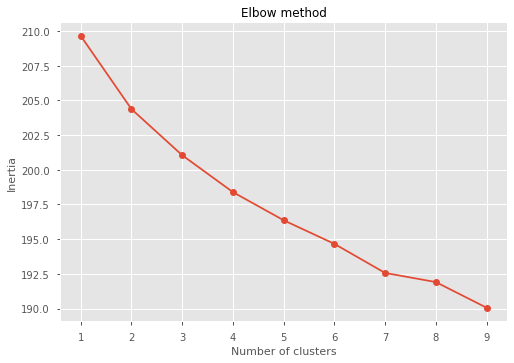

In [44]:
plot_inertia(kmeans, final_df, range(1, 10))

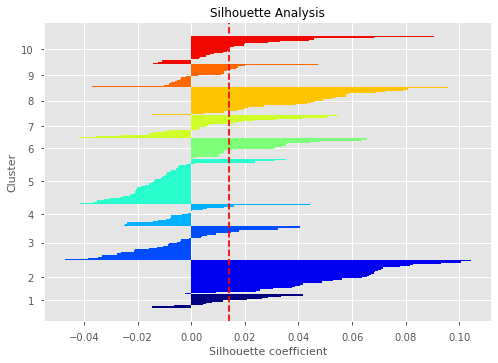

In [45]:
kmeans.set_params(n_clusters=10)
plot_silhouette(kmeans, final_df)

In [46]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [47]:
from sklearn import cluster


In [48]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [49]:
k = 8
kmeans_results = run_KMeans(k, final_df)
kmeans_results

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by s

{2: KMeans(algorithm='full', n_clusters=2, n_jobs=-1, random_state=1),
 3: KMeans(algorithm='full', n_clusters=3, n_jobs=-1, random_state=1),
 4: KMeans(algorithm='full', n_clusters=4, n_jobs=-1, random_state=1),
 5: KMeans(algorithm='full', n_clusters=5, n_jobs=-1, random_state=1),
 6: KMeans(algorithm='full', n_clusters=6, n_jobs=-1, random_state=1),
 7: KMeans(algorithm='full', n_clusters=7, n_jobs=-1, random_state=1),
 8: KMeans(algorithm='full', n_jobs=-1, random_state=1)}

In [50]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

In [62]:
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
dfs[1]['features'].tolist()


['tbsp',
 'sugar',
 'margarine',
 'flour',
 'vanilla',
 'cocoa',
 'cream',
 'self',
 'water',
 'pkg',
 'chicken',
 'butter',
 'milk',
 'mayonnaise',
 'pepper',
 'egg',
 'pecan',
 'large',
 'salt',
 'lemon']

In [67]:
dfs[0]['features'].tolist()

['cream',
 'pkg',
 'sour',
 'chocolate',
 'chip',
 'gram',
 'whip',
 'mix',
 'marshmallow',
 'sugar',
 'box',
 'cool',
 'butter',
 'peanut',
 'crust',
 'cake',
 'coconut',
 'vanilla',
 'graham',
 'cheese']

In [65]:
dfs[3]['features'].tolist()

['lemon',
 'butter',
 'sugar',
 'juice',
 'qt',
 'apple',
 'salt',
 'light',
 'flour',
 'unsalted',
 'grapefruit',
 'brown',
 'whole',
 'cinnamon',
 'potato',
 'milk',
 'soda',
 'baking',
 'medium',
 'syrup']

In [66]:
dfs[4]['features'].tolist()

['slice',
 'cheese',
 'bread',
 'parmesan',
 'chicken',
 'butter',
 'pepper',
 'cooking',
 'garlic',
 'black',
 'italian',
 'spray',
 'olive',
 'spaghetti',
 'package',
 'ground',
 'cream',
 'salt',
 'tomato',
 'half']

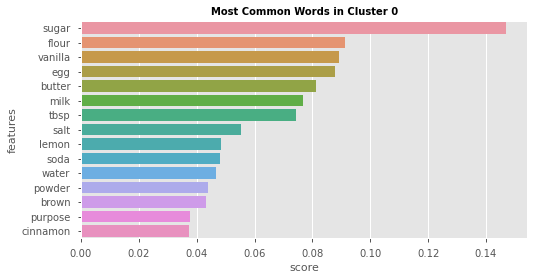

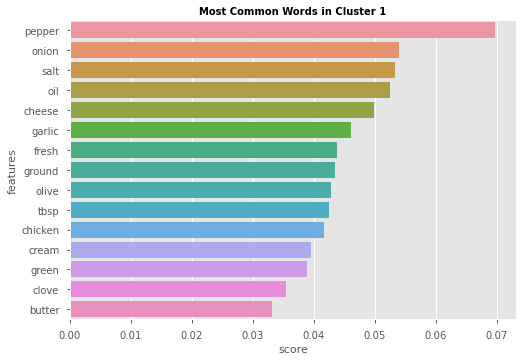

In [51]:
best_result = 2
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 15)

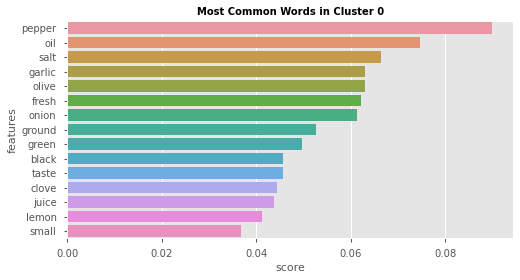

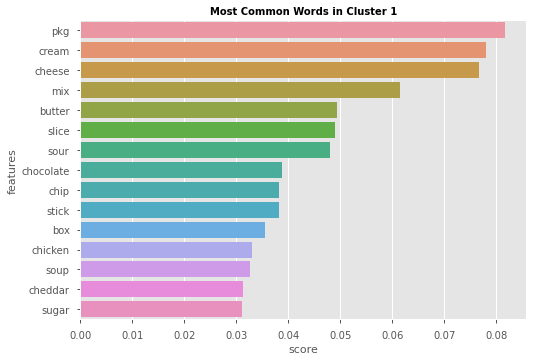

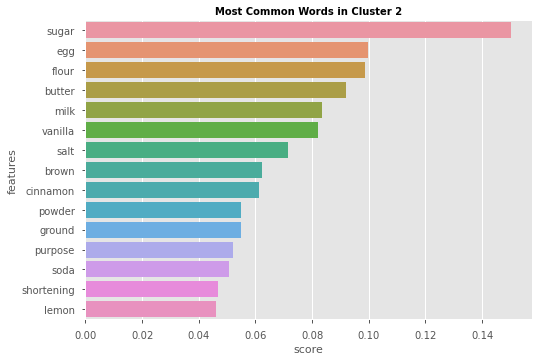

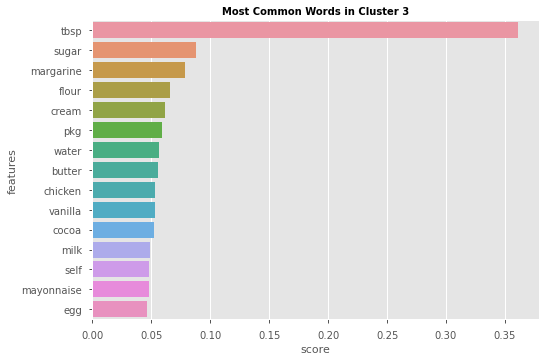

In [52]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 15)

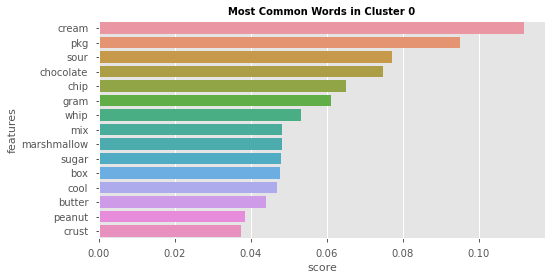

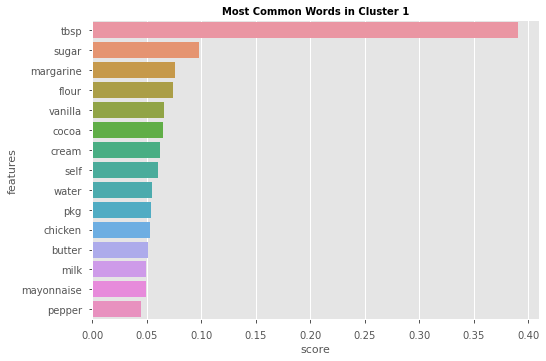

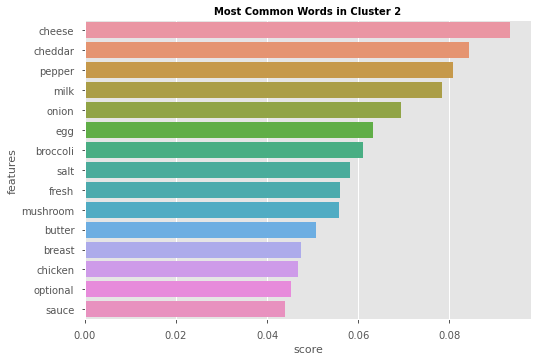

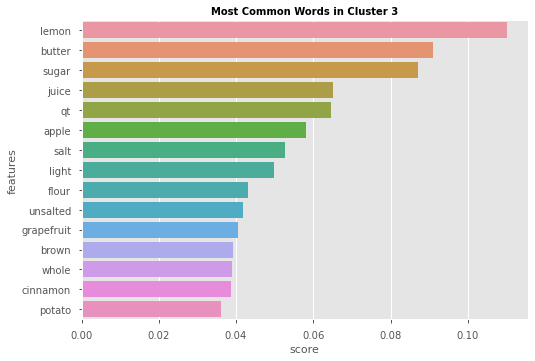

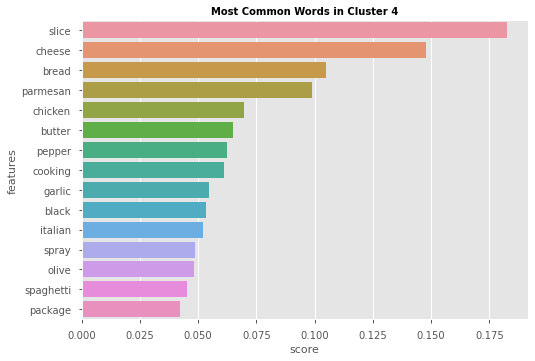

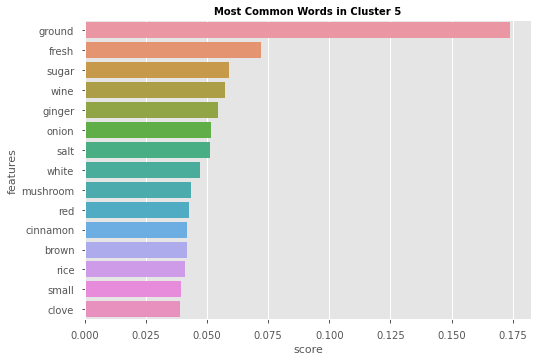

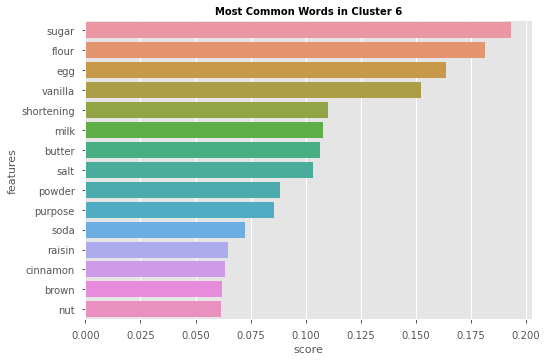

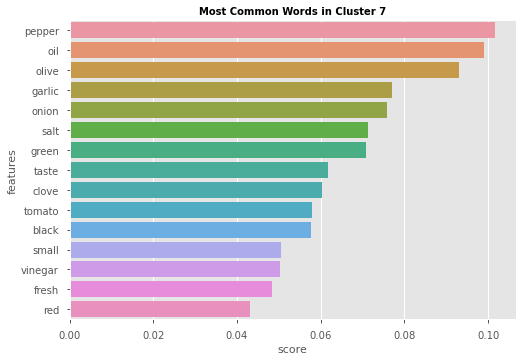

In [53]:
best_result = 8
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 15)

In [ ]:
pip install wordcloud


In [ ]:
from wordcloud                        import WordCloud

In [ ]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

KNN on the directions column